## **0. 루브릭**

### **1) Transformer와 비교해 변경이 필요한 부분을 서술하였다.**
***

* 제출 노트북 파일 앞부분에 텍스트 블럭으로 서술합니다. 변경이 필요한 블럭을 서술합니다.
*  코드블럭에 변경사항을 주석으로 표시합니다.

### **2) 모델의 입력 형태에 맞게 전처리를 수행하였다.**
***

* Decoder 기반의 생성모델 임을 감안하여 챗봇 데이터를 변형합니다.

### **3) 모델의 입력 블럭을 GPT 논문에 기반하여 수정하였다.**
***

* 모델의 input이 정상적으로 구성되었는지 확인합니다.

### **4) GPT 모델을 정상적으로 구성하였다. (model.summary, model.fit 결과 캡쳐 첨부)**
***

* 노드의 transformer 코드를 수정하여 GPT1 모델을 구성합니다.

### **5) 입력에 따른 출력이 생성되었다.**
***

* 출력 결과물이 수준에 상관없이 모델이 정상적으로 동작하는지 확인합니다.

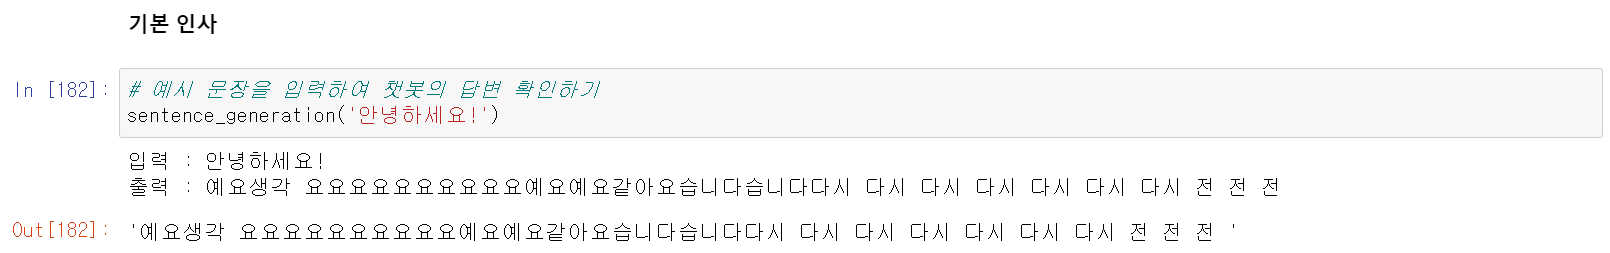

## **1. 프로젝트**

### **STEP 1. 데이터 수집하기**
***

한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용합니다.

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
import pandas as pd
import re
from konlpy.tag import Okt
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
# 데이터 파일 경로 지정하기
data_file_path = '/aiffel/data/ChatbotData .csv'
# CSV 파일 읽어 DataFrame으로 불러오기
df = pd.read_csv(data_file_path)

In [3]:
# 데이터 살펴보기
df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


### **STEP 2. 데이터 전처리하기**
***

In [4]:
questions = df['Q'].tolist()  # 질문 컬럼을 리스트로 변환하기
answers = df['A'].tolist()  # 답변 컬럼을 리스트로 변환하기

In [5]:
# Okt 객체를 생성하여 okt 변수에 저장하기
# 이 객체를 사용하여 한국어 문장을 형태소 단위로 분석할 수 있음.
okt = Okt()

공백 제거, 문장 부호 처리, 형태소 단위 분리 등을 수행하는 문장 전처리 함수 구현하기

In [6]:
# 전처리 함수 구현하기
def preprocess_sentence(sentence):
    # 양쪽 공백 제거하기
    sentence = sentence.strip()  
    # 문장 부호 앞에 공백 추가하기
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    # 여러 개의 공백을 하나로 변환하기
    sentence = re.sub(r'[" "]+', " ", sentence)
    # 알파벳, 숫자, 한국어 문자 제외한 모든 문자 공백으로 변환하기
    sentence = re.sub(r"[^a-zA-Z가-힣0-9?.!,]+", " ", sentence)
    # 형태소 단위로 분리하기
    sentence = ' '.join(okt.morphs(sentence))
    # 양쪽 공백 제거 후 반환하기
    return sentence.strip()

In [7]:
# 질문과 답변에 대해 전처리 함수를 적용하기

# 모든 질문 문장 전처리하기
questions = [preprocess_sentence(q) for q in questions]
# 모든 답변 문장 전처리하기
answers = [preprocess_sentence(a) for a in answers]

In [8]:
# 전처리된 질문과 답변 확인해보기
questions, answers

(['12시 땡 !',
  '1 지망 학교 떨어졌어',
  '3 박 4일 놀러 가고 싶다',
  '3 박 4일 정도 놀러 가고 싶다',
  'PPL 심하네',
  'SD 카드 망가졌어',
  'SD 카드 안 돼',
  'SNS 맞팔 왜 안 하지',
  'SNS 시간 낭비 인 거 아는데 매일 하는 중',
  'SNS 시간 낭비 인데 자꾸 보게 됨',
  'SNS 보면 나 만 빼고 다 행복 해보여',
  '가끔 궁금해',
  '가끔 뭐 하는지 궁금해',
  '가끔 은 혼자 인게 좋다',
  '가난한 자의 설움',
  '가만 있어도 땀 난다',
  '가상 화폐 쫄딱 망함',
  '가스 불 켜고 나갔어',
  '가스 불 켜놓고 나온거 같아',
  '가스 비 너무 많이 나왔다 .',
  '가스 비 비싼데 감기 걸리겠어',
  '가스 비 장난 아님',
  '가장 확실한 건 뭘 까 ?',
  '가족 여행 가기 로 했어',
  '가족 여행 고고',
  '가족 여행 어디 로 가지 ?',
  '가족 있어 ?',
  '가족 관계 알려 줘',
  '가족 끼리 여행 간다 .',
  '가족 들 보고 싶어',
  '가족 들 이랑 서먹해',
  '가족 들 이랑 서먹해졌어',
  '가족 들 이랑 어디 가지 ?',
  '가족 들 이랑 여행 갈거야',
  '가족 여행 가야 지',
  '가족 이 누구 야 ?',
  '가족 이랑 여행 가려고',
  '가족 한테 스트레스 풀었어',
  '가출 할까 ?',
  '가출 해도 갈 데 가 없어',
  '간만 에 떨리니까 좋더라',
  '간만 에 쇼핑 중',
  '간만 에 휴식 중',
  '간식 뭐 먹을까',
  '간식 추천',
  '간장 치킨 시켜야지',
  '간접흡연 싫어',
  '갈까 말까 고민 돼',
  '갈까 말까 ?',
  '감 말랭이 먹고 싶다 .',
  '감 말랭이 먹어야지',
  '감기 같 애',
  '감기 걸린 것 같아',
  '감기 기운 이 있어',
  '감기 들 거 같 애',
  '감기 가 오려나',
  '감기 약 이 없어',
  '감기

### **Step 3. SubwordTextEncoder 사용하기**
***

내부 단어 토크나이저인 `SubwordTextEncoder`를 사용해보자.

In [9]:
# SubwordTextEncoder 사용하기
# 질문과 답변 데이터로부터 서브워드 텍스트 인코더 만들기
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

In [10]:
# 시작 토큰과 종료 토큰 설정하기
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰 확인하기
print('START_TOKEN의 번호 :', [tokenizer.vocab_size])
print('END_TOKEN의 번호 :', [tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [7275]
END_TOKEN의 번호 : [7276]


In [11]:
# 단어 사전의 크기 설정하기
VOCAB_SIZE = tokenizer.vocab_size + 2
# 최대 시퀀스 길이 설정하기
MAX_LENGTH = 30

# 단어 사전의 크기 확인하기
print('단어 사전의 크기 :', VOCAB_SIZE)

단어 사전의 크기 : 7277


최대 길이를 설정하고, 정수를 인코딩 및 패딩해보자.

`GPT-1` 모델의 입력 형식에 맞추어 질문과 답변을 하나의 시퀀스로 결합함.

In [12]:
# 정수 인코딩 및 패딩하기
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs = []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        # GPT-1 모델 입력 형식: 질문과 답변을 하나의 시퀀스로 결합하기
        sentence = START_TOKEN + tokenizer.encode(sentence1) + tokenizer.encode(sentence2) + END_TOKEN
        tokenized_inputs.append(sentence)
    
    # 패딩하기
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    
    return tokenized_inputs

In [13]:
# 전처리된 질문과 답변을 정수 인코딩 및 패딩 처리하기
questions_inputs = tokenize_and_filter(questions, answers)

In [14]:
# 정수 인코딩 및 패딩한 결과 확인하기
questions_inputs

array([[7275, 5220,  713, ...,    0,    0,    0],
       [7275,  808,   88, ...,    0,    0,    0],
       [7275,  458, 1314, ...,    0,    0,    0],
       ...,
       [7275, 7256, 7176, ...,    0,    0,    0],
       [7275,  164,   85, ...,    0,    0,    0],
       [7275, 1680,  120, ...,    0,    0,    0]], dtype=int32)

### **Step 4. 모델 구성하기**
***

**Multi-Head Attention 클래스**

여러 개의 어텐션 헤드를 병렬로 사용하여 서로 다른 부분에서 정보를 추출하고 결합함.

이를 통해 모델은 입력 시퀀스의 다양한 위치 간의 관계를 잘 학습할 수 있음.

In [15]:
# Multi-Head Attention 구현하기
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads  # 어텐션 헤드의 수
        self.d_model = d_model  # 모델 차원

        # 모델 차원이 헤드 수로 나누어 떨어져야 함
        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads  # 각 헤드의 차원

        # Query, Key, Value를 위한 밀집 레이어 정의
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        # 어텐션 결과를 결합하기 위한 밀집 레이어 정의
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        # 헤드 수와 깊이로 분할
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))  # 헤드 수와 깊이로 분할
        # (batch_size, seq_len, num_heads, depth) -> (batch_size, num_heads, seq_len, depth)
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        """
        멀티 헤드 어텐션 계산 함수
        Args:
            v: Value 텐서
            k: Key 텐서
            q: Query 텐서
            mask: 마스크 텐서
        Returns:
            어텐션 결과 텐서
        """
        batch_size = tf.shape(q)[0]  # 배치 크기

        # Query, Key, Value에 대한 밀집 레이어 적용
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

        # 헤드 수와 깊이로 분할
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # 스케일드 닷 프로덕트 어텐션 계산
        # (batch_size, num_heads, seq_len_q, depth)
        scaled_attention, _ = scaled_dot_product_attention(q, k, v, mask)
        
        # 모든 헤드를 결합
        # (batch_size, seq_len_q, num_heads, depth)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        # (batch_size, seq_len_q, d_model)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        # 최종 밀집 레이어 적용
        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

        return output

**스케일드 닷 프로덕트 어텐션 함수(scaled_dot_product_attention)**

주어진 Query(Q), Key(K), Value(V) 간의 어텐션 가중치를 계산하고 이를 이용해 최종 출력을 생성함.

In [16]:
# scaled dot product attention 함수 구현하기
def scaled_dot_product_attention(q, k, v, mask):
    # Query와 Key의 내적 계산하기 (batch_size, num_heads, seq_len_q, seq_len_k)
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)  # Key의 차원 크기
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)  # 차원의 제곱근으로 스케일링하기

    if mask is not None:
        # 마스크를 적용하여 패딩된 위치의 가중치를 매우 작은 값으로 설정하기
        scaled_attention_logits += (mask * -1e9)
    # 소프트맥스 적용하여 가중치 계산하기 (batch_size, num_heads, seq_len_q, seq_len_k)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    # 가중치를 Value에 곱하여 출력 계산하기 (batch_size, num_heads, seq_len_q, depth)
    output = tf.matmul(attention_weights, v)

    return output, attention_weights

**Transformer Block 정의하기**

멀티 헤드 어텐션과 피드 포워드 신경망을 포함.

입력 시퀀스를 처리하고, 각 단계에서 잔차 연결과 층 정규화를 사용하여 더 나은 학습 성능을 제공함.

1. **초기화** : 멀티 헤드 어텐션, 피드 포워드 신경망, 층 정규화, 드롭아웃 레이어를 초기화하기.
2. **멀티 헤드 어텐션** : 입력 x에 대해 멀티 헤드 어텐션을 수행하고, 잔차 연결 및 층 정규화를 적용하여 out1을 생성하기.
3. **피드 포워드 신경망** : out1을 피드 포워드 신경망에 통과시키고, 잔차 연결 및 층 정규화를 적용하여 최종 출력 out2를 생성하기.
4. **출력** : 최종 출력 out2를 반환하기.

In [17]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        # 멀티 헤드 어텐션 레이어 초기화하기
        self.mha = MultiHeadAttention(d_model, num_heads)
        
        # 피드 포워드 신경망 정의 (2개의 Dense 레이어)
        self.ffn = tf.keras.Sequential([
            # 첫 번째 Dense 레이어: dff 차원으로 변환하고 ReLU 활성화 함수 사용하기
            tf.keras.layers.Dense(dff, activation='relu'),
            # 두 번째 Dense 레이어: 원래 차원으로 변환하기
            tf.keras.layers.Dense(d_model)
        ])
        
        # LayerNormalization 레이어 정의하기 (잔차 연결 후 정규화)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        # 드롭아웃 레이어 정의하기 (훈련 시 과적합 방지)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        # 멀티 헤드 어텐션 수행하기
        attn_output = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)  # 드롭아웃 적용
        out1 = self.layernorm1(x + attn_output)  # 잔차 연결 후 LayerNormalization 적용

        # 피드 포워드 신경망 통과하기
        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)  # 드롭아웃 적용
        out2 = self.layernorm2(out1 + ffn_output)  # 잔차 연결 후 LayerNormalization 적용

        return out2  # 최종 출력 텐서 반환하기

**GPT Model 클래스 설명하기**

단어 임베딩, 위치 인코딩, 여러 개의 Transformer 블록, 최종 출력을 위한 밀집 레이어로 구성됨.

이 모델은 주어진 시퀀스에 대해 다음 단어를 예측하거나, 시퀀스의 확장을 통해 텍스트 생성을 수행함.

In [166]:
# GPT 모델 구성하기
class GPTModel(tf.keras.Model):
    def __init__(self, vocab_size, d_model, num_layers, num_heads, dff, max_positional_encoding):
        super(GPTModel, self).__init__()
        self.token_embedding = tf.keras.layers.Embedding(vocab_size, d_model)
        self.d_model = d_model
        self.pos_encoding = self.positional_encoding(max_positional_encoding, d_model)
        self.transformer_layers = [TransformerBlock(d_model, num_heads, dff) for _ in range(num_layers)]
        self.final_layer = tf.keras.layers.Dense(vocab_size)
    
    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(tf.range(position, dtype=tf.float32)[:, tf.newaxis],
                                     tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
                                     d_model)
        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def get_angles(self, position, i, d_model):
        angle_rates = 1 / tf.pow(10000.0, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angle_rates

    def call(self, inputs):
        seq_len = tf.shape(inputs)[1]
        word_embeddings = self.token_embedding(inputs)
        pos_encoding = self.positional_encoding(seq_len, self.d_model)
        word_embeddings += pos_encoding[:, :seq_len, :]
        x = word_embeddings
        for transformer_layer in self.transformer_layers:
            x = transformer_layer(x, training=True, mask=None)
        final_output = self.final_layer(x)
        return final_output

**하이퍼파라미터 설정 및 모델 생성하기**

트랜스 포머 모델을 생성하기 위해 필요한 하이퍼파라미터를 설정하고 모델을 설정해보자.

In [167]:
# 하이퍼파라미터 설정하기
# D_MODEL = 256  # 모델 차원을 늘리기
# NUM_LAYERS = 6  # 층 수를 늘리기
# NUM_HEADS = 8
# DFF = 1024  # 피드포워드 네트워크 차원을 늘리기
# MAX_POSITION_ENCODING = MAX_LENGTH
# VOCAB_SIZE = tokenizer.vocab_size + 2

In [168]:
# GPT 모델 인스턴스 생성하기
gpt_model = GPTModel(VOCAB_SIZE, 
                     D_MODEL, 
                     NUM_LAYERS, 
                     NUM_HEADS, 
                     DFF, 
                     MAX_POSITION_ENCODING)

In [169]:
# 모델 빌드하기
# (입력 형태를 지정하여 모델 빌드)
gpt_model.build(input_shape=(None, MAX_LENGTH))

In [170]:
# 커스텀 학습률 스케줄링 정의하기
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

learning_rate = CustomSchedule(D_MODEL)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [171]:
# 트랜스포머 모델의 학습률을 조정하기 위한 커스텀 학습률 스케줄러 정의하기
learning_rate = CustomSchedule(D_MODEL)
# 커스텀 학습률 스케줄러를 사용하는 Adam 옵티마이저 정의하기
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [172]:
# 정확도 계산하는 함수 정의하기
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH))  # y_true 텐서 재구성하기
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

In [173]:
# 손실 함수 정의하기
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH))  # y_true 텐서 재구성하기
    loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true, y_pred, from_logits=True)  # 손실 계산하기
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)  # 마스크 생성하기
    # 마스크를 적용하여 손실 계산하기
    loss = tf.reduce_sum(loss * mask, axis=-1) / tf.reduce_sum(mask, axis=-1)
    return loss  # 손실 반환하기

In [174]:
# 모델 컴파일하기
gpt_model.compile(optimizer=optimizer, 
              loss=loss_function, 
              metrics=[accuracy])

In [175]:
# 모델 요약하기
gpt_model.summary()

Model: "gpt_model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      multiple                  1862912   
_________________________________________________________________
transformer_block_42 (Transf multiple                  789760    
_________________________________________________________________
transformer_block_43 (Transf multiple                  789760    
_________________________________________________________________
transformer_block_44 (Transf multiple                  789760    
_________________________________________________________________
transformer_block_45 (Transf multiple                  789760    
_________________________________________________________________
transformer_block_46 (Transf multiple                  789760    
_________________________________________________________________
transformer_block_47 (Transf multiple                  

In [176]:
# 데이터셋 구성하기
BUFFER_SIZE = len(questions_inputs)
BATCH_SIZE = 64

dataset = tf.data.Dataset.from_tensor_slices((questions_inputs, questions_inputs))
dataset = dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [177]:
# 모델 학습하기
EPOCHS = 13
history = gpt_model.fit(dataset, 
                        epochs=EPOCHS)

Epoch 1/13
185/185 [==============================] - 16s 53ms/step - loss: 8.2994 - accuracy: 0.0427
Epoch 2/13
185/185 [==============================] - 10s 53ms/step - loss: 6.7926 - accuracy: 0.0834
Epoch 3/13
185/185 [==============================] - 10s 53ms/step - loss: 5.6397 - accuracy: 0.1187
Epoch 4/13
185/185 [==============================] - 10s 53ms/step - loss: 4.5388 - accuracy: 0.1638
Epoch 5/13
185/185 [==============================] - 10s 54ms/step - loss: 3.5253 - accuracy: 0.2315
Epoch 6/13
185/185 [==============================] - 10s 54ms/step - loss: 2.7119 - accuracy: 0.2936
Epoch 7/13
185/185 [==============================] - 10s 55ms/step - loss: 2.0509 - accuracy: 0.3478
Epoch 8/13
185/185 [==============================] - 10s 54ms/step - loss: 1.5079 - accuracy: 0.3910
Epoch 9/13
185/185 [==============================] - 10s 55ms/step - loss: 1.0757 - accuracy: 0.4233
Epoch 10/13
185/185 [==============================] - 10s 55ms/step - loss: 0.724

In [178]:
# 모델 평가하기
loss, accuracy = gpt_model.evaluate(dataset)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

185/185 [==============================] - 8s 31ms/step - loss: 0.0829 - accuracy: 0.4949
Loss: 0.0829448327422142
Accuracy: 0.49493923783302307


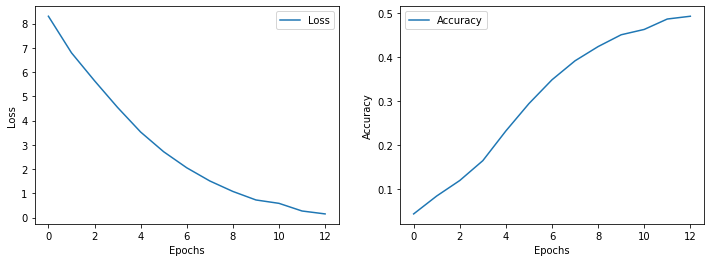

In [179]:
# 학습 손실 및 정확도 시각화하기
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [181]:
def decoder_inference_debug(sentence):
    sentence = preprocess_sentence(sentence)
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)
    output_sequence = tf.expand_dims(START_TOKEN, 0)
    
    print(f"Initial Sentence: {sentence.numpy()}")
    
    for i in range(MAX_LENGTH):
        predictions = gpt_model(sentence, training=False)  # 단일 입력 사용
        predictions = predictions[:, -1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        
        print(f"Step {i+1}, Predictions: {predictions.numpy()}, Predicted ID: {predicted_id.numpy()}")
        
        if tf.equal(predicted_id, END_TOKEN[0]):
            break
        
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)
        predicted_id = tf.expand_dims(predicted_id[:, -1], axis=-1)  # predicted_id의 차원 확장
        sentence = tf.concat([sentence, predicted_id], axis=1)  # 새로운 단어를 입력에 추가
    
    return tf.squeeze(output_sequence, axis=0)

def sentence_generation_debug(sentence):
    prediction = decoder_inference_debug(sentence)
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])
    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))
    return predicted_sentence

Initial Sentence: [[7275 3033   73 7276]]
Step 1, Predictions: [[[-0.8673004 -1.3627719 -1.5598398 ... -0.8978143 -3.4726968  6.89873  ]]], Predicted ID: [[16]]
Step 2, Predictions: [[[-0.9824593 -3.4697378 -1.9035294 ... -0.921041  -1.5384921  3.461557 ]]], Predicted ID: [[16]]
Step 3, Predictions: [[[-0.07004598 -3.5113711  -0.00906266 ...  0.07431141 -0.84695745
    5.576793  ]]], Predicted ID: [[5]]
Step 4, Predictions: [[[-0.52566725 -3.4428258   1.4294693  ... -0.41527683 -1.8826164
    4.951934  ]]], Predicted ID: [[82]]
Step 5, Predictions: [[[ 0.76512897 -1.031647    1.5793023  ...  0.90240026 -4.4838243
    2.3665013 ]]], Predicted ID: [[7]]
Step 6, Predictions: [[[-0.21746865  1.516611    3.7704144  ... -0.22746396 -2.2931364
    2.6457684 ]]], Predicted ID: [[7]]
Step 7, Predictions: [[[-0.3115726   1.5827549   2.7506485  ... -0.02387166 -3.5044863
    2.2898505 ]]], Predicted ID: [[7]]
Step 8, Predictions: [[[-0.11708993  6.8322854   1.6294382  ... -0.24748947 -4.589453
  

'해보세요해보세요거 적 요요요예요예요예요예요예요예요죠없어요없어요없어요없어요없어요없어요없어요없어요없어요없어요없어요 . . . . .'

### **STEP 6. 실험 결과 확인하기**
***

**기본 인사**

In [182]:
# 예시 문장을 입력하여 챗봇의 답변 확인하기
sentence_generation('안녕하세요!')

입력 : 안녕하세요!
출력 : 예요생각 요요요요요요요요요요예요예요같아요습니다습니다다시 다시 다시 다시 다시 다시 다시 전 전 전 


'예요생각 요요요요요요요요요요예요예요같아요습니다습니다다시 다시 다시 다시 다시 다시 다시 전 전 전 '

**기분이 좋을 때(긍정의 감정)**

In [183]:
sentence_generation('나 오늘 기분 너무 좋아 :D')

입력 : 나 오늘 기분 너무 좋아 :D
출력 : 해보세요해보세요해보세요해보세요해보세요예요예요예요예요예요예요요요요요요요요봐요봐요봐요봐요


'해보세요해보세요해보세요해보세요해보세요예요예요예요예요예요예요요요요요요요요봐요봐요봐요봐요'

**기분이 좋지 않을 때(부정의 감정)**

In [184]:
sentence_generation('나 오늘 너무 힘들어..')

입력 : 나 오늘 너무 힘들어..
출력 : 해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요좋겠어요좋겠어요좋겠어요좋겠어요좋겠어요좋겠어요좋겠어요하니 하니 좋아할 좋아할 정도 할 할 할 할 할 할 할 를 를 


'해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요좋겠어요좋겠어요좋겠어요좋겠어요좋겠어요좋겠어요좋겠어요하니 하니 좋아할 좋아할 정도 할 할 할 할 할 할 할 를 를 '

**배고플 때**

In [185]:
sentence_generation('엄청 배고프다.. 오늘 뭐먹지..?')

입력 : 엄청 배고프다.. 오늘 뭐먹지..?
출력 : 해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요좋겠죠덜 덜 그래도 그래도 그래도 그래도 라  . . . . . . . . . ? ? ?지 


'해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요해보세요좋겠죠덜 덜 그래도 그래도 그래도 그래도 라  . . . . . . . . . ? ? ?지 '

**심심할 때**